In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# copy dataset from location
loan_df = pd.read_csv("Loan Prediction Dataset.csv")

In [21]:
# see the first 5 items of the data set
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
# dataset size
loan_df.shape

(614, 13)

In [8]:
# data types of the dataset
loan_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## Analyse and fill in missing data

In [22]:
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
# looks like though "Loan_Amount_Term" is numeric, it is still categorical
loan_df["Loan_Amount_Term"].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

#### Fill in categorical features with the mode

In [23]:
# Gender
loan_df.Gender.fillna(loan_df.Gender.mode()[0], inplace=True)
# Married
loan_df.Married.fillna(loan_df.Married.mode()[0], inplace=True)
# Dependents
loan_df.Dependents.fillna(loan_df.Dependents.mode()[0], inplace=True)
# Self_Employed
loan_df.Self_Employed.fillna(loan_df.Self_Employed.mode()[0], inplace=True)
# Loan_Amount_Term
loan_df.Loan_Amount_Term.fillna(loan_df.Loan_Amount_Term.mode()[0], inplace=True)

#### Fill in continuous features with the mean

In [24]:
loan_df.LoanAmount.fillna(loan_df.LoanAmount.mean(), inplace=True)

In [26]:
loan_df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
# create a new file that has no missing data
loan_df.to_csv("loan-no-missing-data.csv", index = False)

In [30]:
# create a separate DataFrame for filling in your missing data
loan_no_missing_data_df = pd.read_csv("loan-no-missing-data.csv")
loan_no_missing_data_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


## Check for outliers in continuous features

In [39]:
# generate statistics for continuous features
loan_no_missing_data_describe_df = loan_no_missing_data_df[["ApplicantIncome","CoapplicantIncome", "LoanAmount"]].describe()
loan_no_missing_data_describe_df

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,84.037468
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.250000
50%,3812.500000,1188.500000,129.000000
75%,5795.000000,2297.250000,164.750000
max,81000.000000,41667.000000,700.000000


In [40]:
# InterQuartile range check, to find lower and higher outliers per continuous features
def iqr_check(df):
    iqr_info = {}
    for col in df.columns:
        # dictionary of lower and higher outliers per numeric features, using Q1 - 1.5*IQR & Q3 - 1.5*IQR 
        iqr_info[col] = [df[col].loc["25%"] - 1.5*df[col].loc["25%"], df[col].loc["75%"] + 1.5*df[col].loc["75%"]]
    return iqr_info

In [47]:
# pass in the continuous features into the iqr_check function to work out what the lower and higher values are
iqr_range = iqr_check(loan_no_missing_data_describe_df)
iqr_range

{'ApplicantIncome': [-1438.75, 14487.5],
 'CoapplicantIncome': [0.0, 5743.125],
 'LoanAmount': [-50.125, 411.875]}

In [48]:
# Create a column to indicate if `ApplicantIncome` column is an outlier using the lower and higher limit
loan_no_missing_data_df["ApplicantIncome_is_outlier"] = loan_no_missing_data_df["ApplicantIncome"].apply(lambda x: "Yes" if x < iqr_range["ApplicantIncome"][0] or x > iqr_range["ApplicantIncome"][1] else "No")

# Create a column to indicate if `CoapplicantIncome` column is an outlier using the lower and higher limit
loan_no_missing_data_df["CoapplicantIncome_is_outlier"] = loan_no_missing_data_df["CoapplicantIncome"].apply(lambda x: "Yes" if x < iqr_range["CoapplicantIncome"][0] or x > iqr_range["CoapplicantIncome"][1] else "No")

# Create a column to indicate if `LoanAmount` column is an outlier using the lower and higher limit
loan_no_missing_data_df["LoanAmount_is_outlier"] = loan_no_missing_data_df["LoanAmount"].apply(lambda x: "Yes" if x < iqr_range["LoanAmount"][0] or x > iqr_range["LoanAmount"][1] else "No")

In [56]:
loan_no_missing_data_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_is_outlier,CoapplicantIncome_is_outlier,LoanAmount_is_outlier,All_outliers
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,No,No,No,No
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,No,No,No,No
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,No,No,No,No
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,No,No,No,No
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,No,No,No,No
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,No,No,No,No
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,No,No,No,No
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,No,No,No,No


In [55]:
# Create a column to indicate if all of `ApplicantIncome, CoapplicantIncome or LoanAmount` columns is an outlier
loan_no_missing_data_df['All_outliers'] = loan_no_missing_data_df[["ApplicantIncome_is_outlier", "CoapplicantIncome_is_outlier", "LoanAmount_is_outlier"]].apply(lambda x: "Yes" if x.isin(["Yes"]).sum() == 3 else "No", axis=1)

In [57]:
loan_no_missing_data_df["All_outliers"].value_counts()

All_outliers
No     613
Yes      1
Name: count, dtype: int64

In [68]:
# Drop the one line where the three continuous features are outlier
loan_no_missing_data_df_wo_outliers = loan_no_missing_data_df.drop(loan_no_missing_data_df[loan_no_missing_data_df["All_outliers"] == "Yes"].index)


In [71]:
loan_no_missing_data_df_wo_outliers[loan_no_missing_data_df_wo_outliers["All_outliers"] == "Yes"]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_is_outlier,CoapplicantIncome_is_outlier,LoanAmount_is_outlier,All_outliers


In [73]:
loan_no_missing_data_df_wo_outliers.shape

(613, 17)

In [74]:
# remove the Loan ID, as it does not give additional information to our data, also remove the new outlier columns add as these are no longer needed
loan_no_missing_data_df_wo_outliers.drop(columns=["Loan_ID", "All_outliers", "ApplicantIncome_is_outlier", "CoapplicantIncome_is_outlier", "LoanAmount_is_outlier"], inplace=True)


In [75]:
loan_no_missing_data_df_wo_outliers.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [78]:
# combine the Applicant and co-applicant income as one
loan_no_missing_data_df_wo_outliers['TotalIncome'] = loan_no_missing_data_df_wo_outliers['ApplicantIncome'] + loan_no_missing_data_df_wo_outliers['CoapplicantIncome']

In [79]:
# create a new file that has no outlier
loan_no_missing_data_df_wo_outliers.to_csv("loan-no-missing-data_wo_outliers.csv", index = False)

In [4]:
loan_no_missing_data_df_wo_outliers = pd.read_csv("loan-no-missing-data_wo_outliers.csv")

## Graphical analysis of features that are continuous

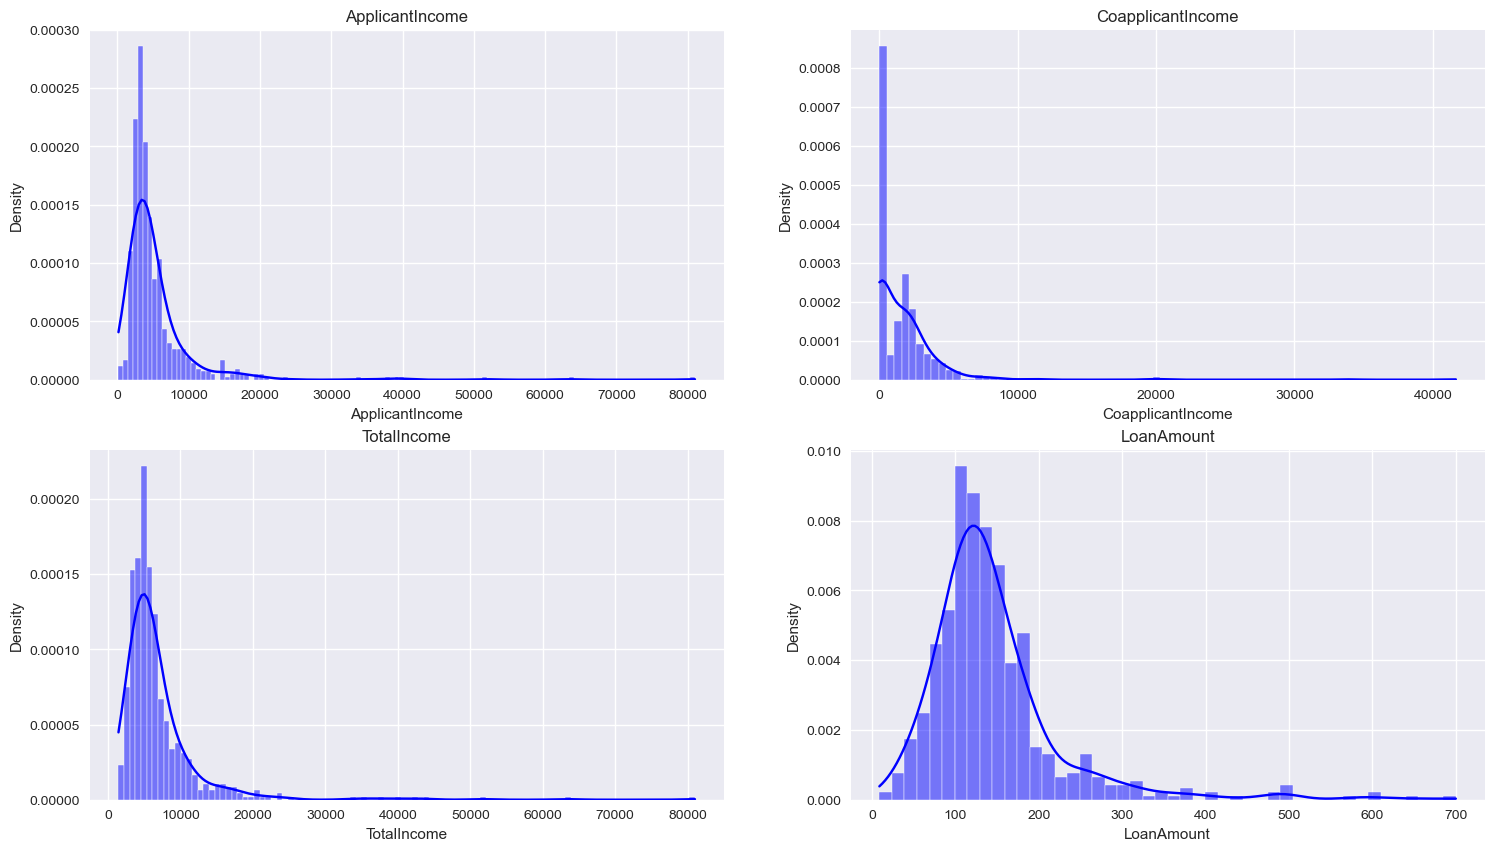

In [7]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

axes[0,0].set_title("ApplicantIncome")
sns.histplot(loan_no_missing_data_df_wo_outliers['ApplicantIncome'], color="blue", kde=True,
             stat="density",ax=axes[0,0])

axes[0,1].set_title("CoapplicantIncome")
sns.histplot(loan_no_missing_data_df_wo_outliers['CoapplicantIncome'], color="blue", kde=True,
             stat="density",ax=axes[0,1])

axes[1,0].set_title("TotalIncome")
sns.histplot(loan_no_missing_data_df_wo_outliers['TotalIncome'], color="blue", kde=True,
             stat="density",ax=axes[1,0])

axes[1,1].set_title('LoanAmount')
sns.histplot(loan_no_missing_data_df_wo_outliers['LoanAmount'], color="blue", kde=True,
             stat="density",ax=axes[1,1])

plt.style.use("seaborn-v0_8")

In [96]:
# Heatmap

# Create table for just features that are continuous 
loan_no_missing_data_df_wo_outliers.cf =  loan_no_missing_data_df_wo_outliers[['ApplicantIncome','CoapplicantIncome',  'TotalIncome','LoanAmount']].copy()

corr = loan_no_missing_data_df_wo_outliers.cf.corr()

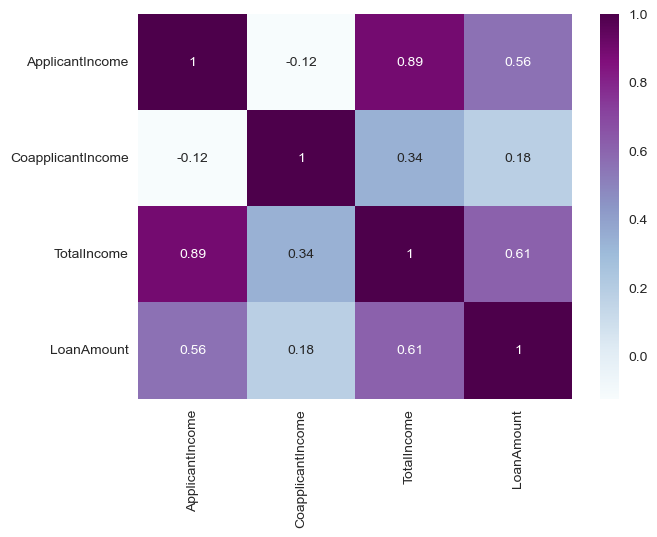

In [100]:
# see the correlation heatmap
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot = True, cmap = "BuPu");